In [1]:
import sys, os
from pathlib import Path

sys.path.append(os.path.abspath(Path().resolve().parent/'src'))

In [2]:
from kinematicsrobotics.datahandler import Save, Extract
from kinematicsrobotics.plottingutils import Plot

## Base de dados

In [3]:
ext = Extract()
ext._path_project = os.path.abspath(Path().resolve().parent)

dataset = ext.dataframe(r'src\data\ready\dataset-radius-1cm.csv')
dataset.shape

(6889, 11)

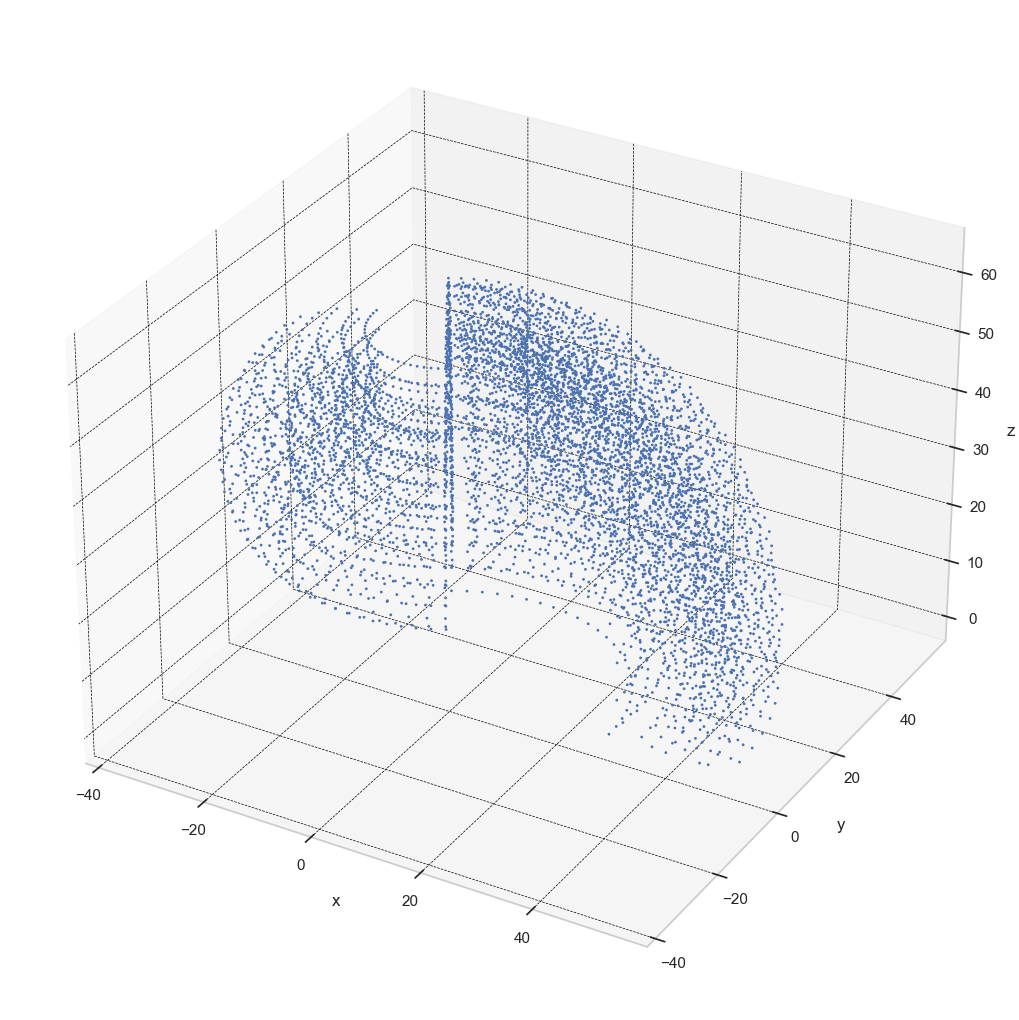

In [23]:
plt = Plot(data = dataset, figsize=(10,30))

plt.scatter3D(labels=['p_x','p_y','p_z'], 
              name_labels=['x','y','z'])

## Clusterização

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kinematicsrobotics.datahandler import Save
from pandas import DataFrame

class Cluster:
    def __init__(self, *, data, n_clusters: int = 4, n_init = 'auto', **kw):
        self.kmeans(n_clusters = n_clusters, 
                    n_init = n_init,  
                    **kw)
        
        self.fit(data = data)

    def kmeans(self, *, n_clusters: int = 4, n_init = 'auto', **kw):        
        self._model = KMeans(n_clusters=n_clusters, 
                        random_state=42,
                        n_init = n_init,
                        **kw)
    
    def fit(self, *, data):
        scaler = StandardScaler()
        self._model.fit(scaler.fit_transform(data))

        # Centroides
        self._norm_centroide = self._model.cluster_centers_
        self._centroide = scaler.inverse_transform(self._model.cluster_centers_)

        # Grupos (cluster)
        self.agrupamento()


    def agrupamento(self):
        self._class_cluster = set(self._model.labels_)

        index_clusters = []

        for cluster in self._class_cluster:
            idex_labels = []
            i = 0
            for labels in self._model.labels_:
                if labels == cluster:
                    idex_labels.append(i)
                i +=1
            index_clusters.append(idex_labels)
        
        self._clusters = index_clusters
    
    def save(self, *, columns, path_data_centers, path_data_cluster):
        sv = Save()

        df_labels = DataFrame(self._centroide, columns = columns)
        sv.dataframe(data = df_labels, path_data=path_data_centers)

        df_labels = DataFrame(self._model.labels_)
        sv.dataframe(data = df_labels, path_data=path_data_cluster)
# r'src\data\ready\data-r1cm-split-local\centers.csv'
# r'src\data\ready\data-r1cm-split-local\cluster.csv'

In [5]:
kmeans = Cluster(data = dataset[['p_x','p_y','p_z']], 
                n_clusters = 4, 
                n_init = 'auto')

kmeans._class_cluster

{0, 1, 2, 3}

In [7]:
from sklearn.cluster import KMeans
from pandas import DataFrame
import matplotlib.pyplot as plte
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# scaler = StandardScaler()
# data_norm = scaler.fit_transform(dataset[['p_x','p_y','p_z']])
# k = list(range(2,15))
# inertia = []
# silhouette = []
# for n_clusters in k:
#     kmeans = KMeans(n_clusters=n_clusters, 
#                     random_state=42,
#                     n_init = 'auto'
#     )
#     kmeans.fit(data_norm)
#     inertia.append(kmeans.inertia_)
#     silhouette.append(metrics.silhouette_score(data_norm, kmeans.labels_))


# data_cust = DataFrame({'k': k,
#                        'inertia':inertia,
#                        'silhouette': silhouette}
# )


# plte.rcParams["font.family"] = "Times New Roman"
# plte.plot(data_cust['k'], data_cust['inertia'], marker='o',color='black')
# plte.xlabel('Número de clusters (k)')
# plte.ylabel('Inércia')
# plte.title('Método do Cotovelo')
# plte.show()


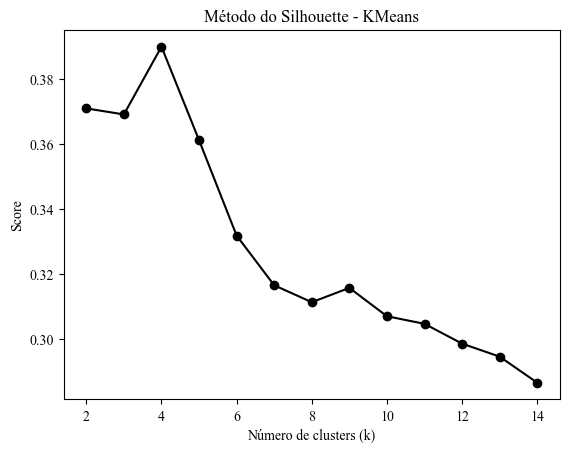

In [18]:
plte.rcParams["font.family"] = "Times New Roman"
plte.plot(data_cust['k'], data_cust['silhouette'], marker='o', color='black')
plte.xlabel('Número de clusters (k)')
plte.ylabel('Score')
plte.title('Método do Silhouette - KMeans')
plte.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, 
                random_state=42,
                n_init = 'auto')

#,'roll','pich','yaw'
kmeans.fit(scaler.fit_transform(dataset[['p_x','p_y','p_z']]))
(kmeans.inertia_)

metrics.silhouette_score(scaler.fit_transform(dataset[['p_x','p_y','p_z']]), kmeans.labels_)

# plt.scatter3D(labels=['p_x','p_y','p_z'], 
#               name_labels=['x','y','z'],
#               s = 3,
#               cmap="viridis",
#               alpha=1,
#               c = kmeans.labels_)

0.3899723461777312

In [9]:
sv = Save()
sv._path_project = os.path.abspath(Path().resolve().parent)


df_labels = DataFrame({'cluster':kmeans.labels_})
sv.dataframe(data = df_labels, path_data=r'src\data\ready\data-r1cm-split-local\cluster.csv')

In [11]:
len(index_clusters)

6

In [13]:
df_labels = DataFrame(kmeans.cluster_centers_, 
                      columns = ['p_x','p_y','p_z']
)
sv.dataframe(data = df_labels, path_data=r'src\data\ready\data-r1cm-split-local\centers_norma.csv')

In [36]:
kmeans.cluster_centers_

array([[ 1.59835037,  0.01958256, -1.12542835],
       [ 0.72955911, -0.04261429,  0.61456721],
       [-0.30807149, -1.74014395,  0.30808009],
       [-0.85926003,  1.24066567, -1.1138726 ],
       [-0.44158386,  0.52444196,  0.63814776],
       [ 0.58510212,  1.05143392, -1.0769451 ],
       [-1.49740935, -1.10918868,  0.44285586],
       [-0.67202569, -1.23663552,  1.13905875]])